In [1]:
%pylab inline
import pandas as pd
pd.set_option('display.precision', 4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plotEffect(df,margin=0.5):
    fig,axes = plt.subplots(1,df.index.size,sharey=True)
    fig.set_size_inches(df.index.size*1.5,2)
    for i in arange(df.index.size):
        ax = axes[i]
        ax.plot(df.columns,df.ix[i,:],'o-')
        ax.set_xlim(0.7,3.3)
        ax.set_ylim(df.min().min()-margin,df.max().max()+margin)
        ax.set_title(df.index[i])
        ax.set_xticks([1,2,3])
    print "\n効果図"
    plt.tight_layout()
    plt.show()

In [17]:
# 静特性および、望目特性の2乗和分解
def staticProp(A,M=1,ve=False,calcSN=False):
    # Degree of Freedom
    Ft = A.size
    Fm = 1
    Fe = Ft - Fm
    # Squared Sum
    St = np.dot(A,A)
    Sm = (A.mean()**2)*A.size # Sm = m*n
    Se = St - Sm
    # Variance
    Vm = Sm/Fm
    Ve = Se/Fe
    # Contribution
    Pm = (Sm-Ve)/St *1.
    Pe = (Se+Ve)/St *1.
    Pt = Pm+Pe
    
    # 品質水準計算のためにVeを返す
    if ve==True:
        return Ve
    
    # calcSNratio[db]
    if calcSN==True:
        eta = ((Sm-Ve)/A.size/M/M)/Ve #eq(8.3)
        return 10*np.log10(eta)
    
    # 有意な偏りmがあるか判定
    if Vm>Ve:
        data = {'F': [Fm,Fe,Ft], 'S':[Sm,Se,St], 'V':[Vm,Ve,nan], 'rho':[Pm,Pe,Pt]}
        df = pd.DataFrame(data=data, index=["m","e","T"])
        print df
    else:
        data = {'F': [Fm,Fe,Ft,Ft], 'S':[Sm,Se,St,St], 'V':[Vm,Ve,nan,St/Ft], 'rho':[Pm,Pe,Pt,Pt]}
        df = pd.DataFrame(data=data, index=["m","e","T","(e)"])
        print df
        print
        print "Vm < Ve より、m を e にプールした"

In [4]:
# 動特性の２乗和分解
def dynamicProp(M,A, calcSN=False, calcS=False, calcB=False, calcStandardSN=False):
    # Degree of Freedom
    Ft = len(A.index)*len(A.columns)
    Fb = 1
    Fnb = len(A.index) - 1
    Fe = Ft - Fb - Fnb
    Fn = Fnb + Fe
    # Squared Sum
    St = (A*A).sum().sum() #eq(4.7)
    L = np.asarray(A).dot(M) # A[3,3]とM[3,1]の行列積[3,1]
    r = (M*M).sum()
    Sb = (L.sum())**2/len(A.index)/r #eq(4.8)
    Snb = (L*L).sum()/r - Sb #eq(4.9)
    Se = St - Sb - Snb
    Sn = Snb + Se
    # Variance
    Vb = Sb/Fb
    Vnb = Snb/Fnb
    Ve = Se/Fe
    Vn = Sn/Fn
    
    # calcSNratio[db]
    if calcSN==True:
        eta = (1./len(A.index)/r*(Sb-Ve))/Vn #eq(4.15)
        return 10*np.log10(eta)
    
    # calc Standard SN ratio[db]
    if calcStandardSN==True:
        eta = (Sb-Ve)/Vn #eq(7.8)
        return 10*np.log10(eta)
    
    # calcS[db]
    if calcS==True:
        S = (1./len(A.index)/r*(Sb-Ve))
        return 10*np.log10(S)
    
    # calcB
    if calcB==True:
        beta = L.mean()/r
        return beta
    
    # PrintTable
    data = {'F': [Fb,Fnb,Fe,Fn,Ft], 'S':[Sb,Snb,Se,Sn,St], 'V':[Vb,Vnb,Ve,Vn,nan]}
    df = pd.DataFrame(data=data, index=["b","N*b","e","(N)","T"])
    print df

## 4ヶ月目 - 問2
>次のような簡単な交流回路において抵抗Rと自己インダクタンスLの交流回路の出力電流yは、次式で与えられ、その単位はアンペア(A)である。
$$y=\frac{V}{\sqrt{R^2+(2\pi{fL})^2}}$$
制御因子はR、Lのに因子、誤差因子は、制御因子の中心値からのばらつきと入力交流電圧Vおよび入力周波数fの4因子を調合する。<br>
以下に制御因子と誤差因子の調合条件を示す。

###1) 制御因子をテキスト注5.1に示された直交表$L_9$の1列~2列にわりつけたとき、<br>No.1について出力yの計算値を得るための計算条件を示し、$N_1, N_2$のyの計算値(小数2位まで）を求めよ。

In [5]:
r_1,r_2,r_3 = 5,10,15
l_1,l_2,l_3 = 0.01,0.02,0.03
r11,r12 = r_1*1.1,r_1*0.9 
l11,l12 = l_1*1.1,l_1*0.9
v1,v2 = 90,110
f1,f2 = 60,50
y11 = v1/((r11**2+(2*np.pi*f1*l11)**2)**0.5)
y12 = v2/((r12**2+(2*np.pi*f2*l12)**2)**0.5)
calcCondition = pd.DataFrame([[1,2,nan,nan,nan],
                              [1,1,nan,nan,nan],
                              [r_1,l_1,nan,nan,nan],
                              [r11,l11,v1,f1,y11],
                              [r12,l12,v2,f2,y12]],
                             index=["対応列　","水準番号","中心値　","N1の水準値","N2の水準値"],
                             columns=["R","L","V","f","計算値y"])
print "\n標準SN比の水準別合計\n",calcCondition


標準SN比の水準別合計
          R      L    V   f    計算値y
対応列　    1.0  2.000  NaN NaN     NaN
水準番号    1.0  1.000  NaN NaN     NaN
中心値　    5.0  0.010  NaN NaN     NaN
N1の水準値  5.5  0.011   90  60  13.066
N2の水準値  4.5  0.009  110  50  20.698


###2) $L_9$のSN比(db)と感度S(db)は次表のようである。前問の結果があっていることを確認し、最適条件と初期条件$R_2L_2$のSN比と感度Sを推定せよ。

(1)の結果よりSN比を求める。

In [6]:
staticProp(np.array([y11,y12]))
staticProp(np.array([y11,y12]),calcSN=True)

   F        S        V    rho
m  1  569.997  569.997  0.903
e  1   29.124   29.124  0.097
T  2  599.121      NaN  1.000


9.6781596920740629

>なぜか合わないんですが・・

####気をとりなおして、最適条件と初期条件のSN比と感度Sを求める。

In [7]:
L9 = pd.DataFrame([[1,1,1,1,7.6,29.2],
                    [1,2,2,2,7.6,23.2],
                    [1,3,3,3,7.6,19.7],
                    [2,1,2,3,9.7,24.3],
                    [2,2,3,1,8.6,21.4],
                    [2,3,1,2,8.1,18.8],
                    [3,1,3,2,10.4,19.9],
                    [3,2,1,3,9.6,18.6],
                    [3,3,2,1,8.9,17.0]],
                    index=list("123456789"),
                    columns=["R","L","e1","e2","SN","S"])
print "\nL9によるわりつけとSN比と感度\n",L9


L9によるわりつけとSN比と感度
   R  L  e1  e2    SN     S
1  1  1   1   1   7.6  29.2
2  1  2   2   2   7.6  23.2
3  1  3   3   3   7.6  19.7
4  2  1   2   3   9.7  24.3
5  2  2   3   1   8.6  21.4
6  2  3   1   2   8.1  18.8
7  3  1   3   2  10.4  19.9
8  3  2   1   3   9.6  18.6
9  3  3   2   1   8.9  17.0



SN比の水準別平均
        1      2      3
R   7.600  8.800  9.633
L   9.233  8.600  8.200
e1  8.433  8.733  8.867
e2  8.367  8.700  8.967

効果図


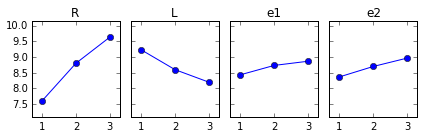

In [8]:
SNave = pd.DataFrame([[L9[L9["R"]==1]["SN"].mean(), L9[L9["R"]==2]["SN"].mean(), L9[L9["R"]==3]["SN"].mean()],
                        [L9[L9["L"]==1]["SN"].mean(), L9[L9["L"]==2]["SN"].mean(), L9[L9["L"]==3]["SN"].mean()],
                        [L9[L9["e1"]==1]["SN"].mean(),L9[L9["e1"]==2]["SN"].mean(),L9[L9["e1"]==3]["SN"].mean()],
                        [L9[L9["e2"]==1]["SN"].mean(),L9[L9["e2"]==2]["SN"].mean(),L9[L9["e2"]==3]["SN"].mean()]],
                        index=["R","L","e1","e2"],
                        columns=["1","2","3"])
print "\nSN比の水準別平均\n",SNave
plotEffect(SNave)


感度Sの水準別平均
         1       2       3
R   24.033  21.500  18.500
L   24.467  21.067  18.500
e1  22.200  21.500  20.333
e2  22.533  20.633  20.867

効果図


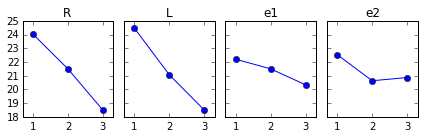

In [9]:
Save = pd.DataFrame([[L9[L9["R"]==1]["S"].mean(), L9[L9["R"]==2]["S"].mean(), L9[L9["R"]==3]["S"].mean()],
                        [L9[L9["L"]==1]["S"].mean(), L9[L9["L"]==2]["S"].mean(), L9[L9["L"]==3]["S"].mean()],
                        [L9[L9["e1"]==1]["S"].mean(),L9[L9["e1"]==2]["S"].mean(),L9[L9["e1"]==3]["S"].mean()],
                        [L9[L9["e2"]==1]["S"].mean(),L9[L9["e2"]==2]["S"].mean(),L9[L9["e2"]==3]["S"].mean()]],
                        index=["R","L","e1","e2"],
                        columns=["1","2","3"])
print "\n感度Sの水準別平均\n",Save
plotEffect(Save)

SN比の効果図より、最適条件はR3L1。（初期条件はR2L2)

In [10]:
ave = SNave.sum(1)[0]/3
eta_opt = SNave.ix["R","3"]+SNave.ix["L","1"]-ave
eta_ini = SNave.ix["R","2"]+SNave.ix["L","2"]-ave
print "最適条件のSN比は、%.1f(db)"%eta_opt
print "現行条件のSN比は、%.1f(db)"%eta_ini

最適条件のSN比は、10.2(db)
現行条件のSN比は、8.7(db)


In [11]:
ave = Save.sum(1)[0]/3
s_opt = Save.ix["R","3"]+Save.ix["L","1"]-ave
s_ini = Save.ix["R","2"]+Save.ix["L","2"]-ave
print "最適条件の感度Sは、%.1f(db)。"%s_opt
print "現行条件の感度Sは、%.1f(db)。"%s_ini

最適条件の感度Sは、21.6(db)。
現行条件の感度Sは、21.2(db)。


###3) 出力の目標値が10Aであるとき、どのような条件がよいかを検討し、<br>そのチューニング条件のSN比と感度Sを推定せよ。

最適条件R3L1における出力電流yは、

In [12]:
r_1,r_2,r_3 = 5,10,15
l_1,l_2,l_3 = 0.01,0.02,0.03
v1,v2 = 90,110
f1,f2 = 60,50
print "%.2f(A)"%(105/((r_3**2+(2*np.pi*55*l_1)**2)**0.5))

6.82(A)


目標値10Aであるから、感度が足りてない。<br>
最適条件ではLは下図よりもっとも高感度の水準に設定されているので、<br>
Rを調整して感度をあげるしかない。<br><br>
たとえばR2L1における出力電流を計算してやると、

In [13]:
r_1,r_2,r_3 = 5,10,15
l_1,l_2,l_3 = 0.01,0.02,0.03
v1,v2 = 90,110
f1,f2 = 60,50
print "%.2f(A)"%(105/((r_2**2+(2*np.pi*55*l_1)**2)**0.5))

9.92(A)


これはほぼ目標通りの値である。<br>
したがって、目標出力電流にチューニングした最適条件はR2L1である。<br>
このとき、SN比と感度Sは、

In [14]:
ave = SNave.sum(1)[0]/3
eta_tune = SNave.ix["R","2"]+SNave.ix["L","1"]-ave
ave = Save.sum(1)[0]/3
s_tune = Save.ix["R","2"]+Save.ix["L","1"]-ave
print "チューニング条件のSN比は、%.1f(db)"%eta_tune
print "チューニング条件の感度Sは、%.1f(db)。"%s_tune

チューニング条件のSN比は、9.4(db)
チューニング条件の感度Sは、24.6(db)。


参考のため効果図を下に再掲する。


SN比(db)の

効果図


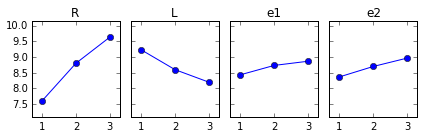


感度S(db)の

効果図


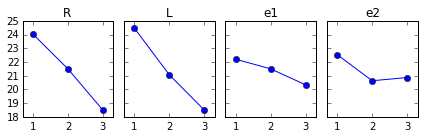

In [15]:
print "\nSN比(db)の"
plotEffect(SNave)
print "\n感度S(db)の"
plotEffect(Save)

In [16]:
%load_ext version_information
%version_information numpy, matplotlib, pandas, ipython, version_information

Software versions
Python 2.7.9 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.56)]
IPython 3.0.0-dev
OS Darwin 14.4.0 x86_64 i386 64bit
numpy 1.10.0.dev+a02f5c8
matplotlib 1.4.2
pandas 0.16.0
ipython 3.0.0.dev0
version_information 1.0.3
Sun Jul 26 16:20:27 2015 JST